<a href="https://colab.research.google.com/github/marcaualex/DSIP/blob/main/Marcau_Alexandru-Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns

In [62]:
loanDf=pd.read_csv("/content/train.csv")
loanDf.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [63]:
pd.crosstab(loanDf.Gender,loanDf.Loan_Status,normalize='index')

Loan_Status,N,Y
Gender,,
Female,0.330357,0.669643
Male,0.306748,0.693252


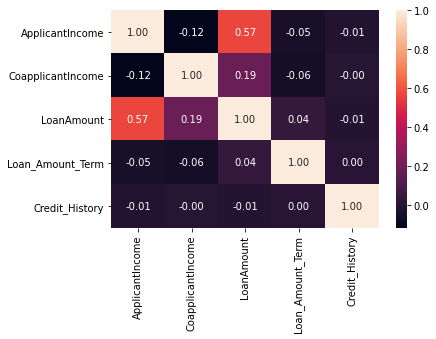

In [64]:
sns.heatmap(loanDf.corr(), annot=True, fmt=".2f")

In [65]:
pd.crosstab(loanDf.Loan_Status,loanDf.Property_Area,normalize='columns')

Property_Area,Rural,Semiurban,Urban
Loan_Status,,,
N,0.385475,0.23176,0.341584
Y,0.614525,0.76824,0.658416


In [66]:
data=loanDf
cat_vars=['Dependents','Gender','Married','Education','Self_Employed','Property_Area','Credit_History']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [67]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg,5)
data=data[to_keep].dropna()
data_X=data.drop(['Loan_ID'],axis=1)
data_y=data['Loan_Status']

In [68]:
data_X.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Loan_Status                0
Dependents_0               0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Gender_Female              0
Gender_Male                0
Married_No                 0
Married_Yes                0
Education_Graduate         0
Education_Not Graduate     0
Self_Employed_No           0
Self_Employed_Yes          0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
Credit_History_0.0         0
Credit_History_1.0         0
dtype: int64

In [69]:
data_X.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Loan_Status', 'Dependents_0', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Gender_Female', 'Gender_Male',
       'Married_No', 'Married_Yes', 'Education_Graduate',
       'Education_Not Graduate', 'Self_Employed_No', 'Self_Employed_Yes',
       'Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban',
       'Credit_History_0.0', 'Credit_History_1.0'],
      dtype='object')

In [70]:
data_X.to_csv("trainDatasetClean.csv")

Logistic Regression

In [71]:
train = pd.read_csv("/content/trainDatasetClean.csv")
test = pd.read_csv("/content/test.csv")

data_X = data_X=data.drop(['Loan_Status','Loan_ID'],axis=1)
data_y = data['Loan_Status']

In [72]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.25, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [73]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.81


In [74]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))

[[23 18]
 [ 9 95]]
              precision    recall  f1-score   support

           N       0.72      0.56      0.63        41
           Y       0.84      0.91      0.88       104

    accuracy                           0.81       145
   macro avg       0.78      0.74      0.75       145
weighted avg       0.81      0.81      0.81       145



2nd LR


In [75]:
data_X2=data_X.drop(['Self_Employed_No','Self_Employed_Yes','Gender_Female','Gender_Male'],axis=1)

In [76]:
data_X2.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Married_No', 'Married_Yes', 'Education_Graduate',
       'Education_Not Graduate', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Credit_History_0.0',
       'Credit_History_1.0'],
      dtype='object')

In [77]:
X_train, X_test, y_train, y_test = train_test_split(data_X2, data_y, test_size=0.25, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.82


In [78]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))

[[23 18]
 [ 8 96]]
              precision    recall  f1-score   support

           N       0.74      0.56      0.64        41
           Y       0.84      0.92      0.88       104

    accuracy                           0.82       145
   macro avg       0.79      0.74      0.76       145
weighted avg       0.81      0.82      0.81       145



In [79]:
data_X2['total_income']=data_X2['ApplicantIncome']+data_X2['CoapplicantIncome']

In [80]:
loanDf.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [81]:
X_train, X_test, y_train, y_test = train_test_split(data_X2.drop(['ApplicantIncome','CoapplicantIncome'],axis=1), data_y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.82


In [82]:
data_X2.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3+', 'Married_No', 'Married_Yes', 'Education_Graduate',
       'Education_Not Graduate', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Credit_History_0.0',
       'Credit_History_1.0', 'total_income'],
      dtype='object')

In [83]:
from sklearn.metrics import confusion_matrix,classification_report
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))

[[ 28  22]
 [  9 115]]
              precision    recall  f1-score   support

           N       0.76      0.56      0.64        50
           Y       0.84      0.93      0.88       124

    accuracy                           0.82       174
   macro avg       0.80      0.74      0.76       174
weighted avg       0.82      0.82      0.81       174

